# ORIE 4580/5580/5581 Assignment 2

#### Students: S. Ulam (su001) and J. von Neuman (jvn001)

### Instructions


* Due Friday September 8, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 4 and 6 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell. You can skip things that seem more advanced, like the Beta distribution in $Ch\, 4$ and the part on queueing in $Ch\,6$ - the part about paradoxes in probability is also strictly speaking not required$\ldots$(but I would never recommend *not* reading that!)

In [5]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


---

---

## Question 1: Practice with expectation and variance (25 pts)



---


**(a)** Given a coin which comes up *Heads* with probability $p$, let $N_p$ denote the number of times the coin is tossed until the first *Heads*. Argue that $$N_p = \begin{cases} 1 & \text{with probability } p\\ 1+\tilde{N}_p & \text{with probability } 1-p \end{cases}$$
where $\tilde{N}_p$ is an independent random variable with the same distribution as $N_p$.
Using this, show that $\mathbb{E}[N_p] = 1/p$. Also use a similar argument to find $Var(N_p)$.

*Note: The rv $N_p$ is said to be a Geometric$(p)$ rv; it has pmf $p(k) = (1-p)^{k-1}p$.*



---



### Ans.


To argue the recurrence relation, observe that when the coin is tossed for the first time, then we have $N_p = 1$ with probability $p$; otherwise, we have already tossed the coin once, and then the same problem repeats -- thus, we have $N_p = 1 + \tilde{N}_p$ with probability $1-p$. 
	
Now let $\mu_p = \mathbb{E}[N_p] = \mathbb{E}[\tilde{N}_p]$. Then we have:
	\begin{align*}
		\mu_p &= (p)(1) + (1-p)\mathbb{E}[1+\tilde{N}_p]\\
		&= p +(1-p)(1+\mu_p)
	\end{align*}	
	Solving we get $\mu_p = \frac{1}{p}$. 
	
Similarly, let $\chi_p = \mathbb{E}[N_p^2] = \mathbb{E}[\tilde{N}_p^2]$. Now we have
	\begin{align*}
		\chi_p &= (p)(1) + (1-p)\mathbb{E}[(1+N_p')^2]\\
		&= p +(1-p)(1+\chi_p + 2\mu_p)\\
		&= 1 + \frac{2(1-p)}{p} + (1-p)\chi_p
	\end{align*}	
	Solving, we get $\chi_p = \frac{2-p}{p^2}$. Finally, we have $Var(N_p) = \chi_p - (\mu_p)^2 = \frac{2-p}{p^2} - \frac{1}{p^2} = \frac{1-p}{p^2}$.
		 

___

**(b)** In the previous assignment you estimated $\pi$ by sampling uniform random points $(X,Y)$ in $[-1,1]\times[-1,1]$, and checking if they fell within the circle. Suppose instead you sampled $n$ points uniformly in $[0,1]\times[0,1]$ and checked if $X^2+Y^2\leq 1$. Let $N_c$ be the number of points satisfying this; what is $\mathbb{E}[N_c]$ and $\text{Var}(N_c)$? Can you use this to get a better estimate of $\pi$ (i.e., with tighter confidence intervals given the same number of samples $n$)?

___

### Ans

Consider the probability that a point will fall into the square $[0,1] \times [0,1]$.

\begin{align*}Pr \left[\text{point falls in the circle}\right]=\frac{\text{area of the circle}}{\text{area of the square}}=\frac{\pi}{4}. \end{align*}

Thus, we have that $N_c$ is the sum of Bernoulli random variable with probability parameter $\frac{\pi}{4}$, which means that $N_c$ has a binomial distribution with parameters $n$ and $p=\pi/4$. Then $\mathbb{E}[N_c] = n\pi/4$ and $\text{Var}[N_c] = n\frac{\pi}{4}(1 - \frac{\pi}{4})$. Now, we can estimate the variance of $\pi_n$ as

$$\text{Var}(\pi_n) = \text{Var}(\frac{4N_c}{n}) = \frac{16}{n^2}n\frac{\pi}{4}(1 - \frac{\pi}{4}) = \frac{4\pi}{n}(1 - \frac{\pi}{4})$$

We may use this true variance for our confidence interval, then if we set $n = 61465600$, we have that the half width is $0.00041$ which makes the full width $0.00082$ which is smaller than the method from homework 1. 

In [3]:
n = 61465600
half_width = 1.96*np.sqrt(4*np.pi*(1-np.pi/4)/n)
print("half width: ", half_width)

half width:  0.00041054584193408095


In [4]:
n = 7840 #being consistent with the previous homework
#half_width = 1.96*np.sqrt(4*np.pi*(1-np.pi/4)/n)
half_width = (1.96*np.sqrt(4*np.pi*(1-np.pi/4)/n))/np.sqrt(n)
print("half width: ", half_width)

half width:  0.000410545841934081


---
**(c)** The elevators in Rhodes Hall stop at $6$ floors. Suppose one morning you get in on the ground floor with $3$ other people, and each one of you wants to go to a floor in $\{2,3,4,5,6\}$ chosen uniformly at random, and independently of the others' choices. At how many floors will the elevator stop on average?


---

### Ans.



Let $X_i = \mathbb{1}_{[\mbox{ Button for floor $i$ is pressed}]}$. Then the number of floors that the elevator stops on (not including the ground floor) is given by $N = X_2+X_3+\ldots +X_6$, and thus by linearity of expectation, we have:
$$\mathbb{E}[N] = \sum_{i=2}^6\mathbb{E}[X_i]$$
Moreover, since every passenger picks a floor at random, we have that $\mathbb{P}[X_i=1] = 1 - \mathbb{P}[\mbox{ No one picks floor $i$}] = 1 - \left(\frac{4}{5}\right)^4$. Thus, we have $\mathbb{E}[N] = 5\left(1 - \left(\frac{4}{5}\right)^4\right) = 2.952$.

---

(d) For your next simulation homework, you pair up with a student you have not met before. At some point, you get bored of the homework, and decide to count how many common friends you have at Cornell. Suppose the total number of students at Cornell is $22,000$, out of which you have $500$ friends, and your homework partner has $440$. Assuming that for both of you, your friends form independent and uniform random samplings of the total student population, what is the expected number of friends you both have in common?

---

### Ans.



Let $X_i = \begin{cases} 1 \qquad \text{if student i is a common friend}\\
0 \qquad \text{if student i is not a common friend}.\end{cases}$

Then the expected number of common friends is 
\begin{align*}
    \mathbb{E}[\sum_{i=1}^{22000} X_i] &= \sum_{i=1}^{22000} \mathbb{E}[X_i] \qquad \text{ (by linearity of expectation)} \\
    &= \sum_{i=1}^{22000} \mathbb{P}(X_i = 1)\\
    &= \sum_{i=1}^{22000} \mathbb{P}(\text{student i is a common friend})\\
    &= \sum_{i=1}^{22000} \mathbb{P}(\text{student i is my friend}) \cdot \mathbb{P}(\text{student i is my partner's friend}) \quad \text{(by independence)} \\
    & \hspace{13cm} \\
    &= \sum_{i=1}^{22000} \frac{500}{22000} \cdot \frac{440}{22000} \qquad \text{ (by uniformness)} \\
    &= 10
\end{align*}

___
___

## Question 2: Pooled Testing (30 pts) ##


In 2020 Fall, Cornell adopted pooled testing to test a large population with a limited number of Covid tests. In pooled testing a sample is taken from each person and split into two subsamples. The first subsample from each person is pooled with those of $n-1$ other people into a single pooled sample of size $n$ people. (Cornell eventually used $n=5$.) If the pooled test comes back negative, then we declare all $n$ people in the pool to be
negative. If the pooled test comes back positive, we then individually test the second subsample from every person in the pool. In this question we'll explore the effects of different pool sizes $n$.

---

**(a)** The *prevalence* $p$ at the time of testing is defined to be the true fraction of people with Covid in the population. Now let $N$ be the number of (true) Covid-positive people in a pool of size $n$. What would you use as a model for the distribution of $N$, if you knew the $n$ people in the pool $(i)$ had never met each other in the last week, and $(ii)$ all lived in the same house. In each case, what is the mean and variance of $N$?

---

### Ans.



Due to the prevalence $p$ which is the true fraction, then the Covid status of people are independent of one another. Now, we may view $n$ people as trials, and prevalence as the probability of success. Thus, the number $N$ is binomially distributed with parameters $n, p$. Finally, the mean and variance are $np$ and $np(1-p)$. However, for the case when they are correlated (perfectly or partially), anything reasonable is acceptable.

___

**(b)** Suppose that the test has no *false positives* and no *false negatives*; it comes back positive if **anyone** in the pool is positive and comes back negative if all people in the pool are negative. Let $T$ be the number of tests you need to be *sure* of each persons status (i.e., if they are COVID positive or not). What is the distribution of $T$, and what is its mean and variance? Clearly state all assumptions you are making.

---

### Ans.



For the whole group of $n$ people, we can have either one test (all negative), or $n+1$-tests (if at least one person is positive). Hence,

$$T = 
\begin{cases}
1 & \text{with prob } \,\, (1-p)^n  \\
n+1 & \text{with prob } \,\, (1 - (1-p)^n)
\end{cases}$$

Then, we have

$$\mathbb{E}[T] = (1)(1-p)^n + (n+1)(1 - (1 - p)^n) = 1 + n(1 - (1 - p)^n)$$

$$Var[T] = (1-p)^n + (n+1)^2(1 - (1 - p)^n) - (1 + n(1 - (1 - p)^n))^2 = n^2(1-p)^n(1-(1-p)^n)$$

___

**(c)** What is the pool size $n$ that minimizes the average number of tests per person when the prevalence is $0.0001$? What about when prevalence is $0.01$? You should do this numerically using plots (i.e., without calculus), as this is helps explain your recommendation to decision-makers (note though that you may want to test different ranges of $n$ for each setting).

---

### Ans.



When $p = 0.01$, the average number of test is minimized at $n = 11$, where when $p = 0.0001$, $n$ will be much larger at $n = 101$.

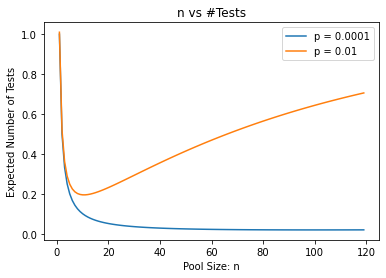

In [16]:
def ave_test(n, p):
    return (1/n) + (1 - (1 - p)**n)

n = np.arange(1,120,1)
#n2 = np.arange(10,60,1)
ave_test1 = np.zeros(len(n))
ave_test2 = np.zeros(len(n))
for i in range(len(n)):
    p = 0.0001
    ave_test1[i] = ave_test(n = n[i], p = 0.0001)
    p = 0.01
    ave_test2[i] = ave_test(n = n[i], p = 0.01)

plt.plot(n,ave_test1, label = "p = 0.0001")
plt.plot(n,ave_test2, label = "p = 0.01")
plt.xlabel("Pool Size: n")
plt.ylabel("Expected Number of Tests")
plt.title("n vs #Tests")
plt.legend()
plt.show()



---

*(d)* A more critical characteristic of pooled tests is the false negative rate, which is the probability that a test comes back negative when at least one person in the pool is Covid positive. False negatives are dangerous, because the person (or people) with Covid in the pool can infect others until Covid is otherwise detected or they become no longer infectious.

You know that false negatives must be more likely when there is a low viral load in a sample. To understand how to model false negatives in PCR tests, you consult with your friend who is a biologist, who tells you that the viral load $V$ in a PCR sample is measured using something called the cycle threshold (CT) score of a PCR test, which is equivalent to $C = -\log_2 V$. The viral load for a Covid-negative person is $V=0$. In a pooled sample of size $n$, each person contributes a fraction $1/n$ of the sample, and the resulting viral load has a total CT score of:
$$-\log_2 \left(\frac 1 n \sum_{i=1}^n 2^{-C_i}\right),$$
where $C_1, C_2, \ldots, C_n$ are the CT scores of each person in the pool. Finally, your friend recalls that probability $\mathbb{P}[\text{false positive test}|C]$ of a false negative in a single PCR test is well modeled either as
$\frac{1}{1 + \exp(-10(C - 35))}$ or $\frac{1}{1 + \exp(10(C - 35))}$ (but he can not remember which one 🙁).

Can you figure out what the correct model is?

---



### Ans.

Note that false negatives are more likely when viral load is low, and the total CT score is 

$$-\log_2 \left(\frac 1 n \sum_{i=1}^n V_i\right)$$

When $V_i$ are low, then the total CT score will be high. Hence, for false negative we should have the fucntion

$$\frac{1}{1 + \exp(-10(C - 35))}$$

so that false negative value is large. 



---


*(e)* You consult the epidemiology literature and find that the viral load for a Covid-positive person has been found from data to have a CT score $C$ that is well modeled via a *mixture of Gaussian* distribution as follows: with probability $0.40$, $C$ is $\mathcal{N}(20, 3.5^2)$ (i.e., normally distributed with mean 20 and variance $3.5^2$); with probability $0.5$, $C$ is $\mathcal{N}(30, 3^2)$, and otherwise,  $C$ is $\mathcal{N}(34.78, 1.32^2)$.

Use this data with the above model to estimate the probability of a false negative in a pooled test of size $n$ containing a single Covid-positive person as a function of $n$. You'll need to generate, say, $m$ replications of the pooled test at each value of $n$, where you should choose $m$ to ensure that your results are meaningful. Report your results as a graph with the false negative rate on the $y$-axis and the pool size $n$ ranging from 1 to 50 on the $x$-axis. Select your simulation runlength so that your estimates would be useful in practice (for example, estimates that are $\pm$ 0.02 or so are sufficiently accurate).


---


### Ans.



In [14]:
from scipy.stats import norm

In [15]:
#return a single FN rate from given n
def prob_false_neg(n):
    #assume that there is only one person
    #with positive test
    U = np.random.uniform(0,1)
    if(U < 0.4):
        C = np.random.normal(loc = 20, scale = 3.5)
    elif(U < 0.9):
        C = np.random.normal(loc = 30, scale = 3)
    else:
        C = np.random.normal(loc = 34.78, scale = 1.32)
        
    #This formula is simplified as d = 1
    CT = -np.log2((2**(-C))/n)
    return 1/(1 + np.exp(-10*(CT - 35)))

In [16]:
#computing sample sizes needed for different values of n
sample_sizes = np.zeros(50)
m = 100
#i is the size of pool
for i in range(50):
    #store FN rates for each value of n = i + 1
    false_neg_rates = np.zeros(m)
    for j in range(m):
        #n = i + 1 since i starts at 0
        false_neg_rates[j] = prob_false_neg(i + 1)
        
    s_squared = np.var(false_neg_rates)
    l = 0.02
    z = norm.ppf(q = 1 - 0.025) #95% confidence interval
    sample_sizes[i] = np.ceil(((z**2)*(s_squared))/l**2)

In [17]:
FN_rates = np.zeros(50)
half_widths = np.zeros(50)
for i in range(50):
    prob = np.zeros(int(sample_sizes[i]))
    
    for j in range(int(sample_sizes[i])):
        prob[j] = prob_false_neg(i + 1)

    half_widths[i] = 1.96*(np.std(prob)/np.sqrt(sample_sizes[i]))
    FN_rates[i] = np.mean(prob)

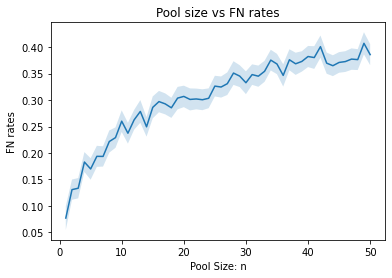

In [21]:
plt.plot(np.arange(1,51,1),FN_rates)
plt.fill_between(np.arange(1,51,1),FN_rates - half_widths,FN_rates + half_widths,alpha = 0.2)
plt.xlabel("Pool Size: n")
plt.ylabel("FN rates")
plt.title("Pool size vs FN rates")
plt.show()

## Question 3: Buffon and his magic needle (20 points)

In the first class we saw Buffon's needle experiment in which we drop needles of length 1 on a floor of parallel lines that are equally spaced 1 unit apart. If we drop $n$ needles and $N_{cross}$ of them cross a line, then an estimate of $\pi$ is $\hat{\pi}_n = 2n/N_{cross}$. We will now study how this works in practice (feel free to use the code provided in class).


---

**(a)** For a range of values of $n$ between $10$ and $10,000$, perform $30$ replications of the Buffon needle experiment. For each value of $n$ you test, plot the average of the $30$ estimates $\hat{\pi}_n = 2n/N_{cross}$ and a 95\% confidence interval for the expected value of $\hat{\pi}_n$. You should only be making one plot, with $n$ on the $x$-axis, and estimates and CIs on the $y$-axis.



---



### Ans.

In [2]:
# N = number of throws 
# length = length of match
# dist = distance between lines
def sample_intersections(N, length=1, dist=1):
    xcent = np.random.uniform(0,dist/2.0,N)
    theta = np.random.uniform(0,np.pi/2,N)
    # calculate the position of the lower tip
    xtip_l  = xcent - (length/2.0)*np.sin(theta)
    intersections = (xtip_l < 0)      
    return intersections

def get_est(num_rep,N):
    results = np.zeros((num_rep,N))
    for i in range(num_rep):
        results[i,:] = sample_intersections(N)
        #results[i] = 2*N/sum(temp)
    return results

In [129]:
n_values = np.arange(10,10001,1)
num_values = len(n_values)
means = np.zeros(num_values)
lefts = np.zeros(num_values)
rights = np.zeros(num_values)

vals = get_est(num_rep=30,N=10000)
#means = np.cumsum(vals)/(1+np.arange(10000))

for i in range(num_values):
    estimates = (2*n_values[i])/np.sum(vals[:,0:n_values[i]],axis = 1)
    means[i] = np.mean(estimates)
    lefts[i] = means[i] - 1.96*(np.var(estimates)/np.sqrt(30))
    rights[i] = means[i] + 1.96*(np.var(estimates)/np.sqrt(30))

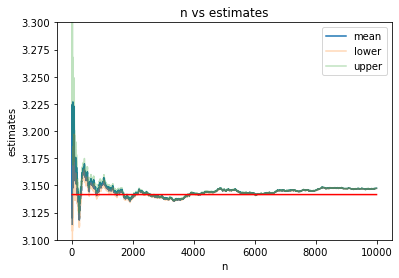

In [134]:
#plt.figure(figsize=(22,6))
plt.plot(n_values,means,label="mean")
plt.plot(n_values,lefts,label="lower",alpha = 0.3)
plt.plot(n_values,rights,label="upper", alpha = 0.3)
plt.plot(n_values,np.pi*np.ones(num_values),color='red')
#plt.fill_between(n_values,lefts,rights,alpha=0.5)
plt.legend()
plt.ylim(3.1,3.3)
plt.xlabel("n")
plt.ylabel("estimates")
plt.title("n vs estimates")
plt.show()


---

**(b)** You may notice from your plot in part (a) that the estimator $\hat{\pi}_n$ has some *bias*, i.e., $\mathbb{E}[\hat{\pi}_n] \neq \pi$ (this may be more apparent for small values of $n$). Pick a small value (say, $n=100$), and do more replications (i.e., do multiple experiments, where in each experiment you throw $100$ needles), and determine if $\hat{\pi}_n$ is an overestimate or underestimate for $\pi$.


---


### Ans.

In [141]:
Reps = [100,250,500,1000,5000]

for rep in Reps:
    vals = get_est(num_rep=rep,N=100)
    estimates = (2*100)/np.sum(vals,axis = 1)
    print("# replications: ", rep)
    print("pi hat: ", np.round(np.mean(estimates),3))
    print("-------------------")

# replications:  100
pi hat:  3.166
-------------------
# replications:  250
pi hat:  3.164
-------------------
# replications:  500
pi hat:  3.153
-------------------
# replications:  1000
pi hat:  3.162
-------------------
# replications:  5000
pi hat:  3.159
-------------------


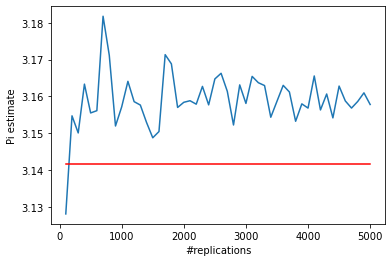

In [6]:
pi_est = []
Reps = np.arange(100,5100,100)

for rep in Reps:
    vals = get_est(num_rep=rep,N=100)
    estimates = (2*100)/np.sum(vals,axis = 1)
    pi_est.append(np.mean(estimates))

plt.plot(Reps,pi_est)
plt.plot(Reps,np.ones(len(pi_est))*np.pi,color='red')
plt.xlabel("#replications")
plt.ylabel("Pi estimate")
plt.show()

Yes, it seems that $\hat{\pi}_n$ does overestimate the value of $\pi$.

**(c)** Can you mathematically justify your observation from part (b)?

### Ans.

Let $N_c$ be $N_{cross}$. Consider the function $f(x) = 1/x$ which is convex, then by Jensen's Inequality, we have that 

$$\mathbb{E}[\frac{2n}{N_c}] = 2n\mathbb{E}[\frac{1}{N_c}] \ge \frac{2n}{\mathbb{E}[N_c]}$$

Now, consider the random variable $N_c$. Note that from how we simulate, the probability that a needle (length $1$) will cross the line (distance $1$) is 

$$Pr(x_c < \frac{\sin \theta}{2})$$

where $x_c$ is the center of the needle and $x_c \sim $Unif $[0,1/2]$ and $\theta \sim$ Unif$[0,\pi/2]$. The probability above can be computed as 


\begin{align*}
    Pr(x_c < \frac{\sin \theta}{2}) & = \int^{\pi/2}_{0} \frac{\sin \theta}{2 \times 1/2}\frac{2}{\pi}d\theta \\
    & = \frac{2}{\pi}
\end{align*}

and because $N_c$ is the number of needle crossing the line, then this is a Binomial random variable with parameters $n$ and $p = 2/\pi$. Hence, $\mathbb{E}[N_c] = 2n/\pi$, thus

$$\mathbb{E}[\frac{2n}{N_c}] \ge \frac{2n}{\mathbb{E}[N_c]} = \pi$$

**(d)** Note however that you can still use Buffon's experiment to get an estimate with $95$\% confidence intervals for $\mathbb{E}[\frac{N_{\text{cross}}}{n}]$. Using this, can you get a $95$\% confidence interval for $\pi$? (Note: this need not be symmetric about $\pi$).

### Ans.

In [17]:
#CI for Nc/n
reps = 100;n = 100
vals = get_est(num_rep=reps,N=n)
estimates = np.sum(vals,axis = 1)/reps
mu = np.mean(estimates);sd = np.std(estimates)
left = np.round(mu - 1.96*sd/np.sqrt(reps),3)
right = np.round(mu + 1.96*sd/np.sqrt(reps),3)
print("Ncross/n 95% CI: [", left, ",", right,"]")


print("pi 95% CI: [", np.round(2/right,3), ",", np.round(2/left,3), "]")

Ncross/n 95% CI: [ 0.615 , 0.633 ]
pi 95% CI: [ 3.16 , 3.252 ]


**(e) (Optional for everyone!)** Try to convince yourself (by linearity of expectation), that

(i) If you randomly throw $n$ matches of length $\ell$ and let $N^{\ell}_{\text{cross}}$ be a count of how many times these cross the lines, then $\frac{\mathbb{E}[N^{\ell}_{\text{cross}}]}{\ell} = $ constant (in other words, the expected number of crossings is proportional to $\ell$). Note: if $\ell>1$, each match may cross multiple lines.

(ii) The above result remains true if you throw *any* line segment (with any shape) of length $\ell$. Using this, can you see an easy way to compute $\mathbb{E}[N^{1}_{\text{cross}}]$ (i.e., the probability of a match crossing a line in the original experiment)?

### Ans

In $(i)$, same as the last question, we have that $N^{\ell}_{cross}$ is also Binomial random variable with the probability $p = \frac{2\ell}{\pi}$. Then $\mathbb{E}[N^{\ell}_{cross}] = \frac{2n\ell}{\pi}$ which makes $\frac{\mathbb{E}[N^{\ell}_{cross}]}{\ell} = 2n/\pi$ a constant. For $(ii)$, we can consider a line segment of any shape of length $\ell$ and we will consider different sections of this line segment where each has unit length, where $X_i$ is the number of times section $i$ crossing the lines. Note that $\mathbb{E}[X_i] = \mathbb{E}[N^{1}_{cross}]$, then

$$\mathbb{E}[N^{\ell}_{cross}] = \mathbb{E}[X_1 + X_2 + ... + X_{\ell}] = \ell \mathbb{E}[N^{1}_{cross}]$$

or, this is an easy way to compute 

$$\mathbb{E}[N^{1}_{cross}] = \frac{\mathbb{E}[N^{\ell}_{cross}]}{\ell}$$

## Question 4: Overbooking (25 points)

A website called Tixmaster is in charge of selling tickets for an upcoming Taylor Swift concert in Ithaca. The concert will take place in the State Theater, which has an official capacity of $1500$ seats. You believe however that Tixmaster has sold $1600$ tickets (representatives of the company, when contacted, denied this$\ldots$).

The show starts at 7pm, and if a ticket holder hasn't shown up by that time, then they are not allowed to enter anymore so as to not disturb the other attendees. From experience, you believe that there is a 95\% chance that someone who has bought a ticket actually shows up by 7pm. and that people show up (or not) independently from one another.



---

**(a)** You wait inside the State Theater and count the number of people entering. What is the probability that you will be able to prove that Tixmaster is overbooking? (You can do this with or without simulation)


---

### Ans.

In [142]:
from scipy.special import comb

Using the prior belief, we have that the probability of overbooking is 

$$\sum_{k > 1500} {1600 \choose k}(0.95^k)(0.05^{1600-k})$$

because the number of people whi show up on time is binomially distributed, and this can be computed below

In [156]:
sum([comb(1600,i)*(0.95**i)*(0.05**(1600-i)) for i in range(1501,1601,1)])

0.9851873005805121

**(b)** You manage to catch Tixmaster overbooking this time, and to prevent it in future, you decide to impose a fine to try and disincentivize overbooking. You know Tixmaster earns $\$100$ in profit for every ticket sold (whether the holder shows up or not). You again have an agent counting how many people show up to the concert by $7$pm (you can not see how many are late or no-shows), and can charge Tixmaster a fine of \$500 for each person exceeding the capacity.

Use a simulation to estimate how many extra tickets (over 1500) Tixmaster will sell, if they are trying to maximize their expected profit (after paying any fines).

### Ans.

Let $x$ be the number of tickets sold, and $Y$ is the number of people who show up. Then, the total profit after fined is 

$$100x - 500(Y - 1500)^{+}$$

where $z^{+} = \max\{z,0\}$ is called $\textbf{positive part}$ function and $Y \sim $ Binomial$(n=x,p=0.95)$

In [4]:
def pos_part(x):
    if(x >= 0):
        return x
    else:
        return 0

#compute the average profit of x tickets sold under N simulations
def mean_profit(x, N):
    Y = np.random.binomial(n = x, p = 0.95, size = N)
    profit = np.zeros(N)
    for i in range(N):
        profit[i] = 100*x - 500*(pos_part(Y[i] - 1500)) 
    
    return np.mean(profit)

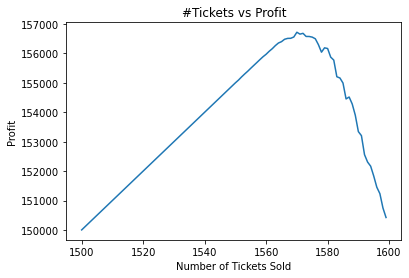

In [28]:
#plotting profit
tickets_sold = np.arange(1500,1600,1)
ave_profit = np.zeros(len(tickets_sold))

for i in range(len(tickets_sold)):
    ave_profit[i] = mean_profit(x = tickets_sold[i],N = 500)

plt.plot(tickets_sold,ave_profit)
plt.xlabel("Number of Tickets Sold")
plt.ylabel("Profit")
plt.title("#Tickets vs Profit")
plt.show()

In [29]:
print("Number of extra tickets: ", tickets_sold[np.argmax(ave_profit)] - 1500)

Number of extra tickets:  70




---



**(c) (For 5580/5581 students; optional for 4580)** Finally, you decide to stamp down on any overbooking by setting a large enough penalty so that Tixmaster does not find it profitable to sell even one extra ticket. Use simulation to find a fee $F$ charged per person over $1500$ admitted to the theater, such that it stops overbooking for each person who book after the number tickets sold exceed the capacity. (Ideally, try to propose as small an $F$ as possible, so that the city government feels it is practical to implement).

*(Note: This sort of a problem where you want to optimize a parameter via simulation is difficult. We will see some ways to do this more efficiently later in class; however, for this problem, it is easy to do a search over potential values of $F$ to find the first time that overbooking by even $1$ ticket becomes unprofitable.)*


---



### Ans.

Since we are charging for those who come after when capacity is full, then we can equate the profit per ticket to the charge, i.e. 

$$F\times Pr(Bin(1501,0.95) = 1501) = 100$$

This makes 

$$F = \frac{100}{0.95^{1501}}$$